# Insurance Claims- Fraud Detection

# 1.Dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
ins=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [37]:
ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# 2.Checking basic details

In [38]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [39]:
ins.shape

(1000, 40)

In [40]:
ins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [41]:
#checking if null values are present
ins.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Label Encoding:

In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

ins['policy_bind_date']=le.fit_transform(ins['policy_bind_date'])
ins['policy_state']=le.fit_transform(ins['policy_state'])
ins['policy_csl']=le.fit_transform(ins['policy_csl'])
ins['insured_sex']=le.fit_transform(ins['insured_sex'])
ins['insured_education_level']=le.fit_transform(ins['insured_education_level'])
ins['insured_occupation']=le.fit_transform(ins['insured_occupation'])
ins['insured_hobbies']=le.fit_transform(ins['insured_hobbies'])
ins['insured_relationship']=le.fit_transform(ins['insured_relationship'])
ins['incident_date']=le.fit_transform(ins['incident_date'])
ins['incident_type']=le.fit_transform(ins['incident_type'])
ins['collision_type']=le.fit_transform(ins['collision_type'])
ins['incident_severity']=le.fit_transform(ins['incident_severity'])
ins['authorities_contacted']=le.fit_transform(ins['authorities_contacted'])
ins['incident_state']=le.fit_transform(ins['incident_state'])
ins['incident_city']=le.fit_transform(ins['incident_city'])
ins['incident_location']=le.fit_transform(ins['incident_location'])
ins['property_damage']=le.fit_transform(ins['property_damage'])
ins['police_report_available']=le.fit_transform(ins['police_report_available'])
ins['auto_make']=le.fit_transform(ins['auto_make'])
ins['auto_model']=le.fit_transform(ins['auto_model'])
ins['fraud_reported']=le.fit_transform(ins['fraud_reported'])

ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,2004,1,NaN
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,NaN
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,2007,0,NaN
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,2014,1,NaN
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,2009,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,2006,0,NaN
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,2015,0,NaN
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,67500,7500,7500,52500,11,19,1996,0,NaN
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,2,46980,5220,5220,36540,1,5,1998,0,NaN


In [43]:
ins.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

# EDA:
Visualization:

<AxesSubplot:xlabel='months_as_customer', ylabel='count'>

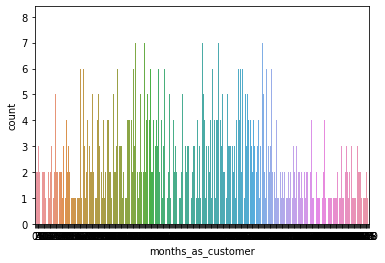

In [44]:
sns.countplot(ins['months_as_customer'])

<AxesSubplot:xlabel='age', ylabel='count'>

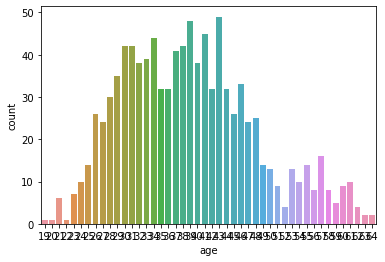

In [45]:
sns.countplot(ins['age'])

<AxesSubplot:xlabel='policy_number', ylabel='count'>

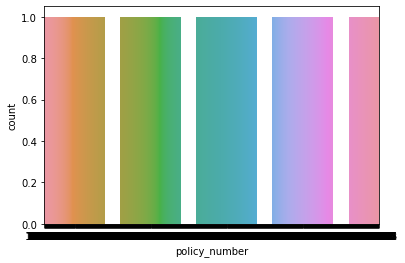

In [46]:
sns.countplot(ins['policy_number'])

<AxesSubplot:xlabel='policy_bind_date', ylabel='count'>

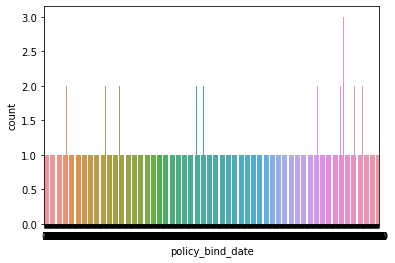

In [47]:
sns.countplot(ins['policy_bind_date'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

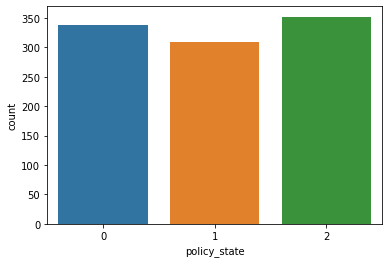

In [48]:
sns.countplot(ins['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

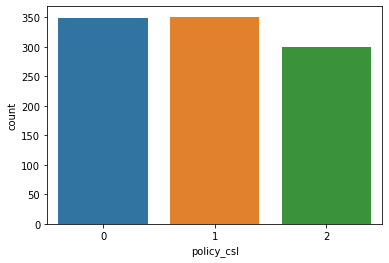

In [49]:
sns.countplot(ins['policy_csl'])

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

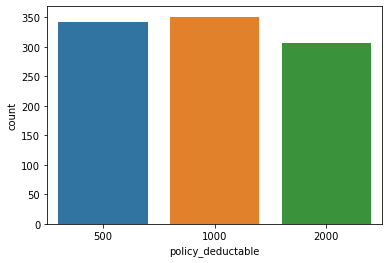

In [50]:
sns.countplot(ins['policy_deductable'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

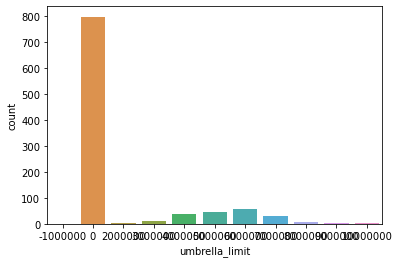

In [51]:
sns.countplot(ins['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='count'>

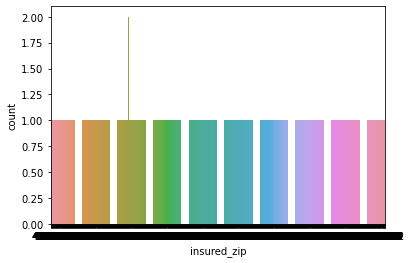

In [52]:
sns.countplot(ins['insured_zip'])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

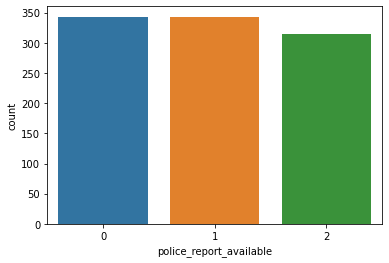

In [53]:
sns.countplot(ins['police_report_available'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

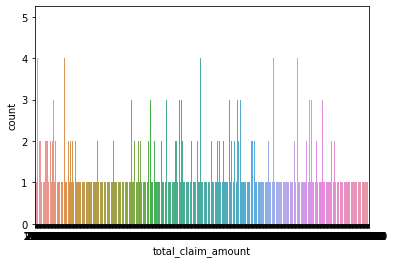

In [54]:
sns.countplot(ins['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim', ylabel='count'>

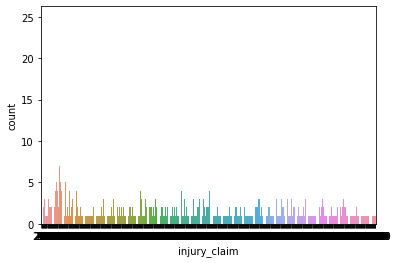

In [55]:
sns.countplot(ins['injury_claim'])

<AxesSubplot:xlabel='property_claim', ylabel='count'>

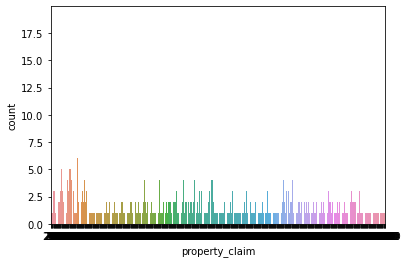

In [56]:
sns.countplot(ins['property_claim'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='count'>

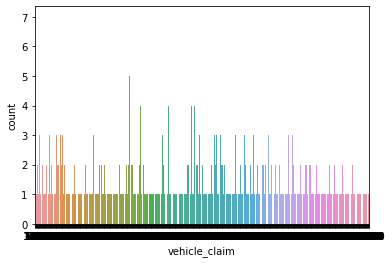

In [57]:
sns.countplot(ins['vehicle_claim'])

<AxesSubplot:xlabel='auto_make', ylabel='count'>

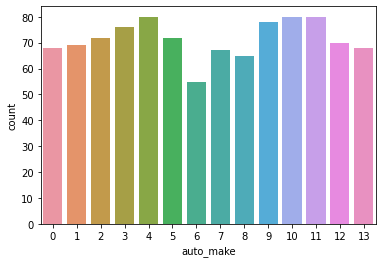

In [58]:
sns.countplot(ins['auto_make'])

<AxesSubplot:xlabel='auto_model', ylabel='count'>

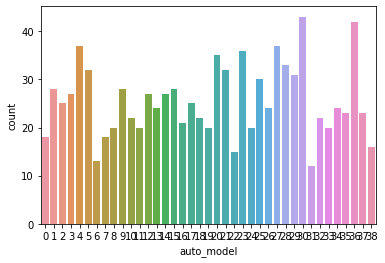

In [59]:
sns.countplot(ins['auto_model'])

<AxesSubplot:xlabel='auto_year', ylabel='count'>

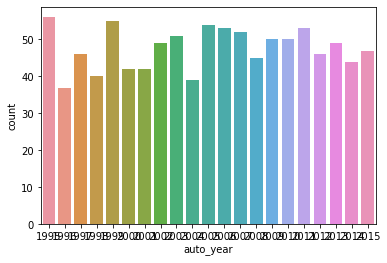

In [60]:
sns.countplot(ins['auto_year'])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

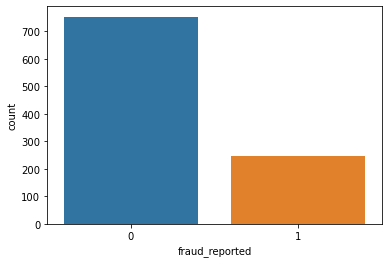

In [61]:
sns.countplot(ins['fraud_reported'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='fraud_reported'>

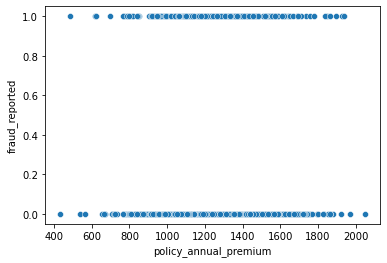

In [62]:
sns.scatterplot(x='policy_annual_premium',y='fraud_reported',data=ins)

We can see that policy_annual_premium column is equally distributed in the range 700 to 1800

# Correlation:

In [63]:
ins.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,NaN
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,NaN
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,NaN
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642,NaN
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,NaN
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,NaN
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,NaN
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,NaN
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,NaN


# Correlation using heatmap:

<AxesSubplot:>

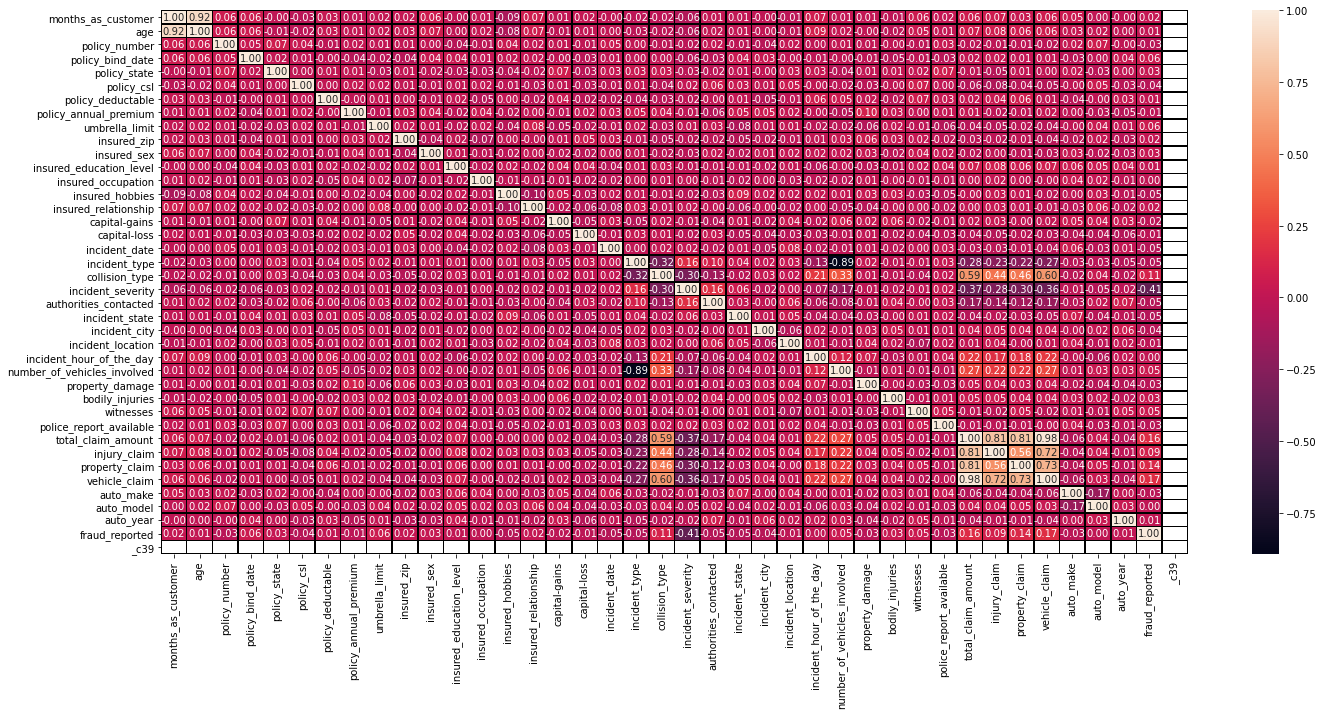

In [64]:
plt.figure(figsize=(23,10))
sns.heatmap(ins.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

Outcome of correlation:

Column months_as_customer is 2% correlated with the target column fraud_reported. Column age is 1% correlated with the target column fraud_reported. Column policy_number is 3% negatively correlated with the target column fraud_reported. Column policy_bind_date is 6% correlated with the target column fraud_reported. Column policy_state is 3% correlated with the target column fraud_reported. Column policy_csl is 4% negatively correlated with the target column fraud_reported. Column policy_deductable is 1% correlated with the target column fraud_reported. Column policy_annual_premium is 1% negatively correlated with the target column fraud_reported. Column umbrella_limit is 6% correlated with the target column fraud_reported. Column insured_zip is 2% correlated with the target column fraud_reported. Column insured_sex is 3% correlated with the target column fraud_reported. Column insured_education_level is 1% correlated with the target column fraud_reported. Column insured_occupation is 0% correlated with the target column fraud_reported. Column insured_hobbies is 5% negatively correlated with the target column fraud_reported. Column insured_relationship is 2% correlated with the target column fraud_reported. Column capital-gains is 2% negatively correlated with the target column fraud_reported. Column capital-loss is 1% negatively correlated with the target column fraud_reported. Column incident_date is 5% negatively correlated with the target column fraud_reported. Column incident_type is 5% negatively correlated with the target column fraud_reported. Column collision_type is 11% correlated with the target column fraud_reported. Column incident_severity is 41% negatively correlated with the target column fraud_reported. Column authorities_contacted is 5% negatively correlated with the target column fraud_reported. Column incident_state is 5% negatively correlated with the target column fraud_reported. Column incident_city is 4% negatively correlated with the target column fraud_reported. Column incident_location is 1% negatively correlated with the target column fraud_reported. Column incident_hour_of_the_day is 0% correlated with the target column fraud_reported. Column number_of_vehicles_involved is 5% correlated with the target column fraud_reported. Column property_damage is 3% negatively correlated with the target column fraud_reported. Column bodily_injuries is 3% correlated with the target column fraud_reported. Column witnesses is 5% correlated with the target column fraud_reported. Column police_report_available is 3% negatively correlated with the target column fraud_reported. Column total_claim_amount is 16% correlated with the target column fraud_reported. Column injury_claim is 9% correlated with the target column fraud_reported. Column property_claim is 14% correlated with the target column fraud_reported. Column vehicle_claim is 17% negatively correlated with the target column fraud_reported. Column auto_make is 3% negatively correlated with the target column fraud_reported. Column auto_model is 0% correlated with the target column fraud_reported. Column auto_year is 1% correlated with the target column fraud_reported.

Max.Correlation:incident_severity

Min.Correlation:age,policy_deductable,policy_annual_premium,insured_education_level,capital-loss,incident_location,auto_year

No Correlation:insured_occupation,incident_hour_of_the_day,auto_model



In [66]:
ins.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,NaN


Descibe of dataset using heatmap:

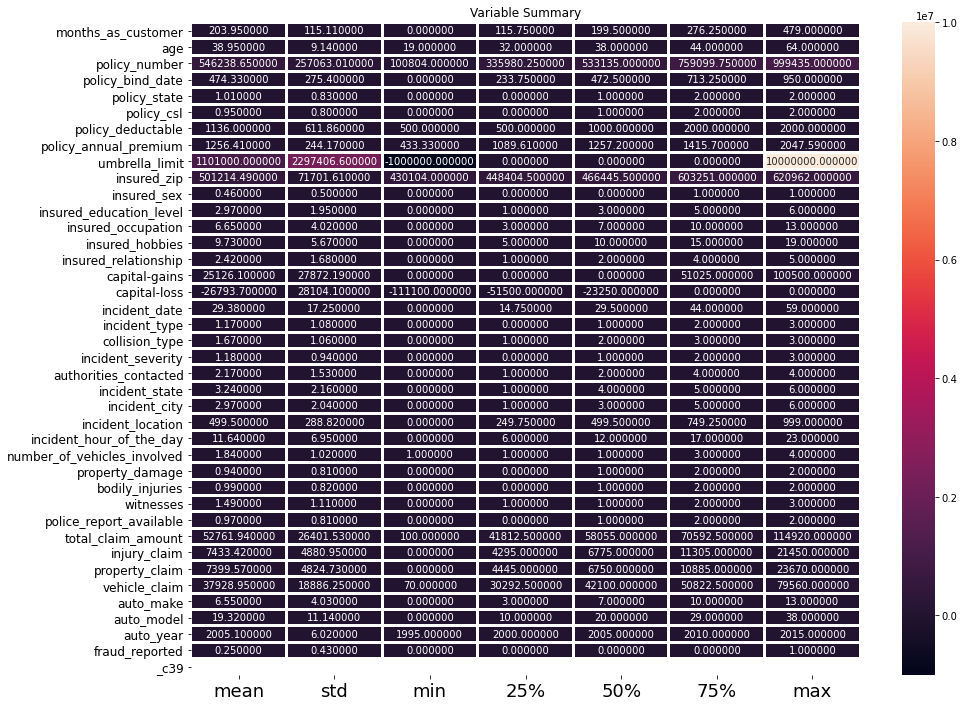

In [67]:
plt.figure(figsize=(15,12))
sns.heatmap(round(ins.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

In [68]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

# Outliers Checking:

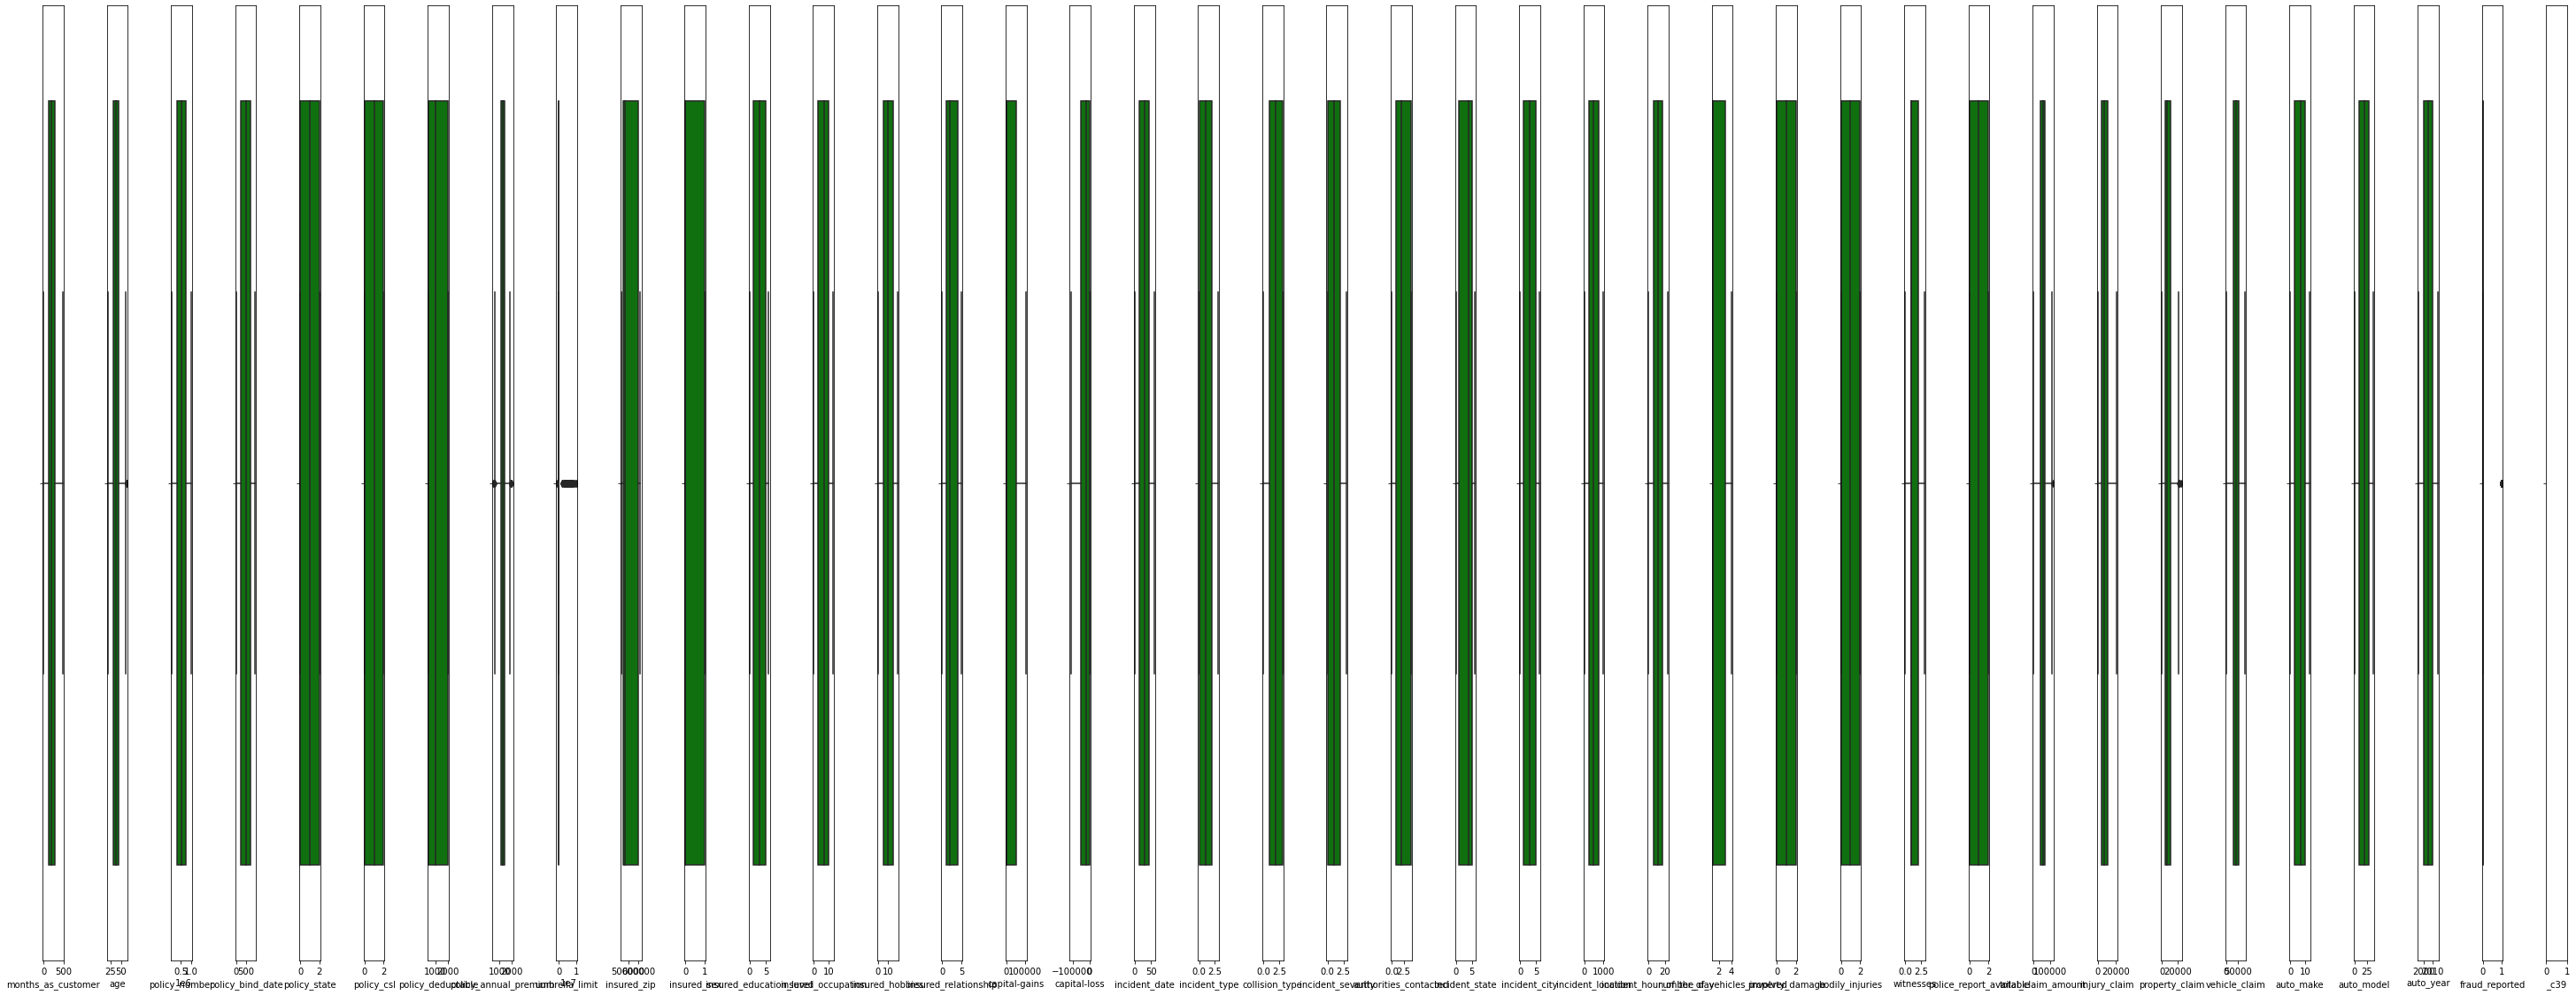

In [70]:
coll=ins.columns.values
ncol=40
nrow=18
plt.figure(figsize=(ncol,7*ncol))
for i in range(0,len(coll)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(ins[coll[i]],color='green')
    plt.tight_layout()

# Skewness:

In [71]:
ins.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


Outcome of skewness:

Skewness threshold is taken as +/-0.5.

# Normal Distribution Curve:

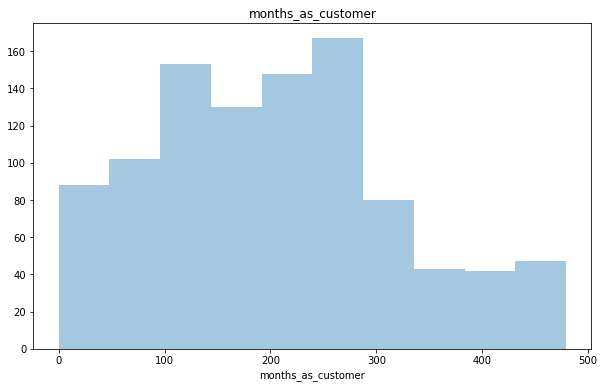

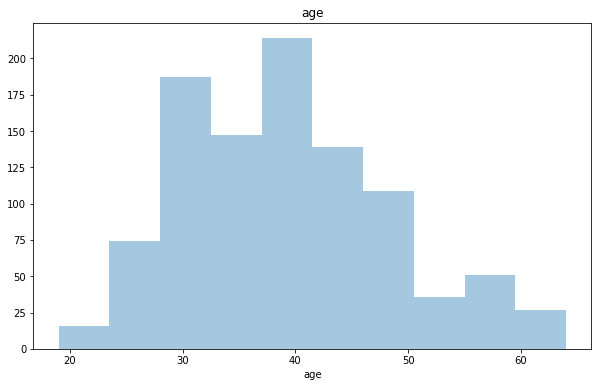

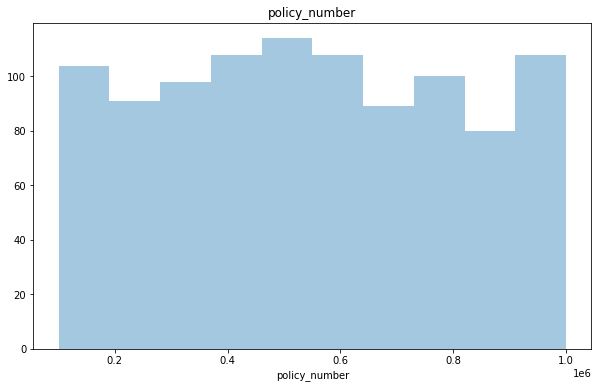

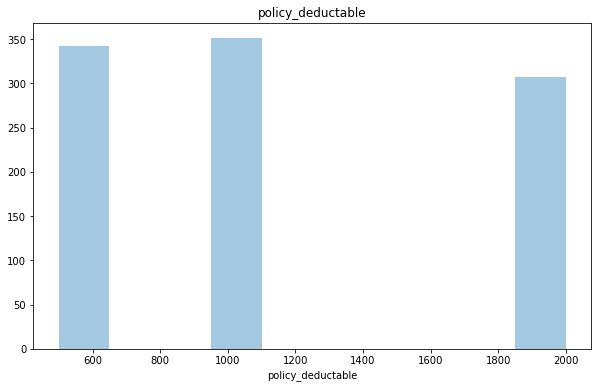

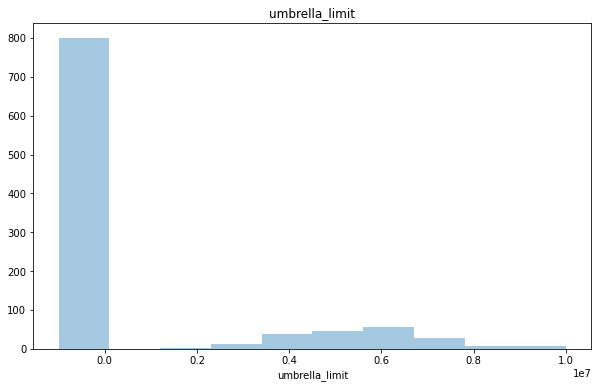

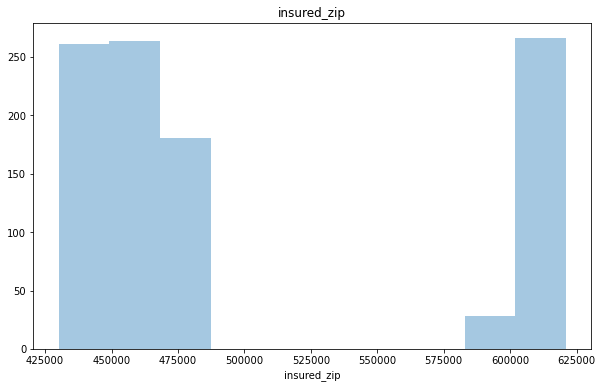

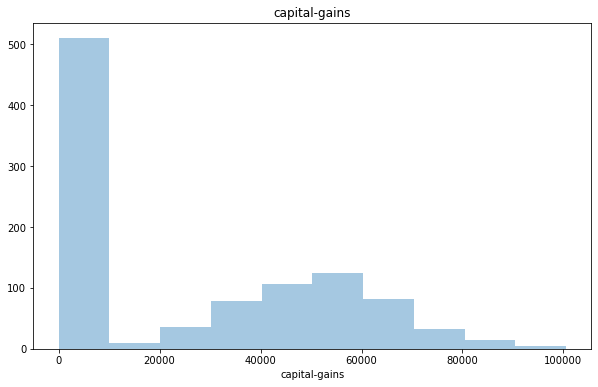

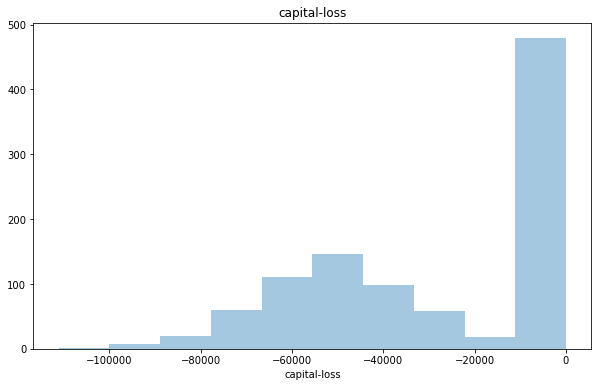

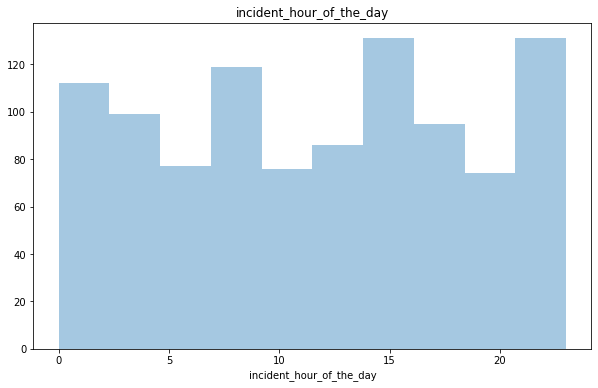

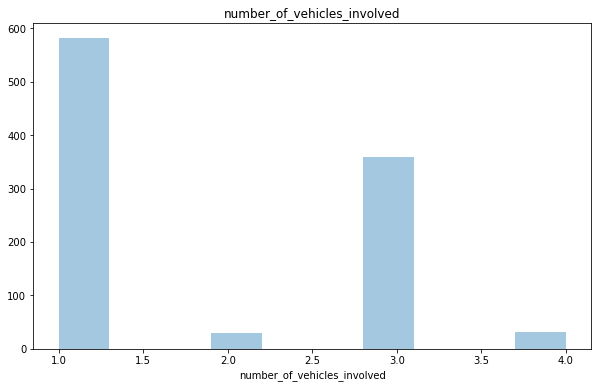

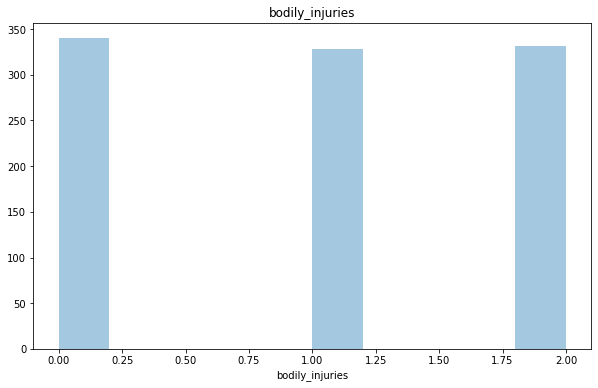

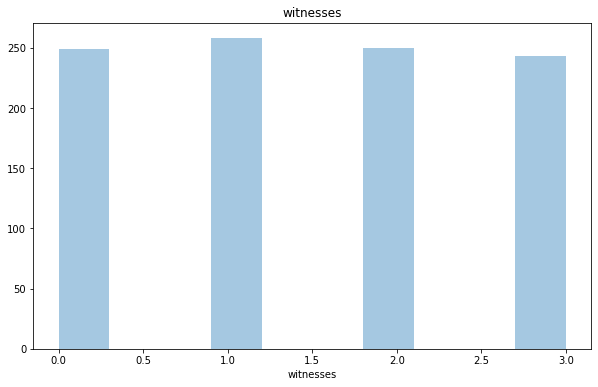

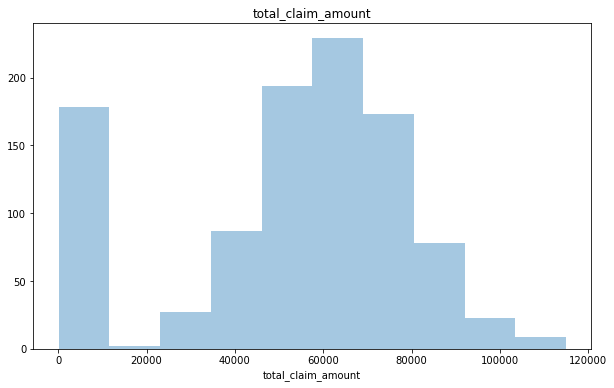

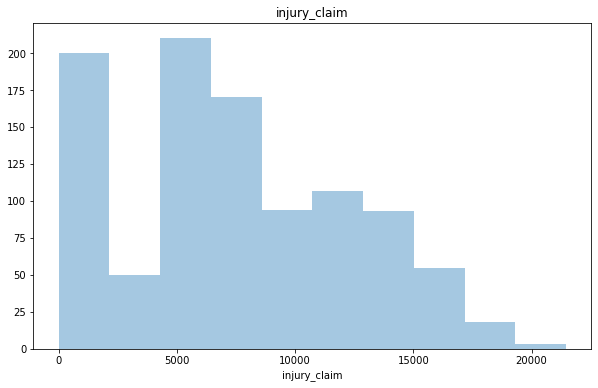

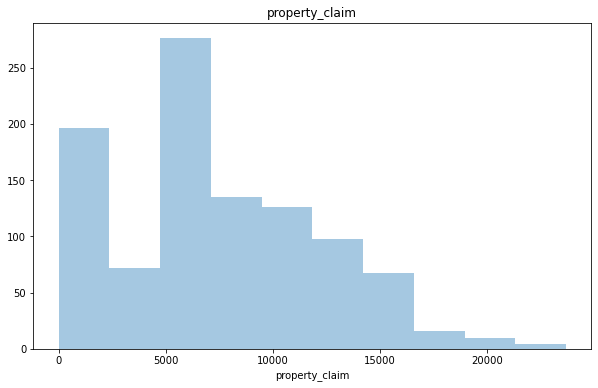

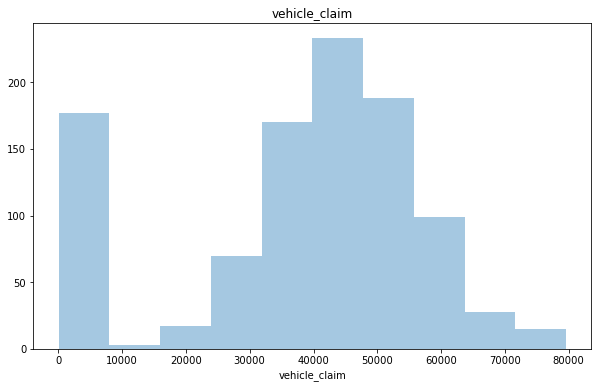

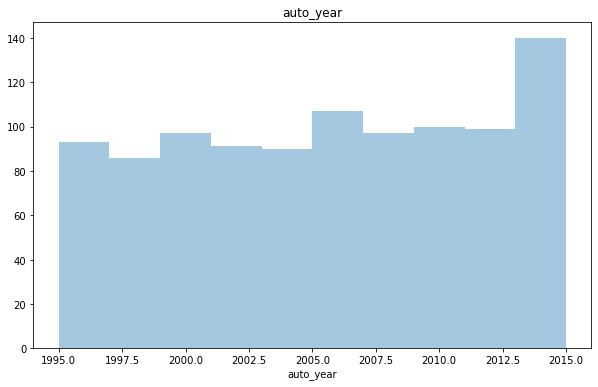

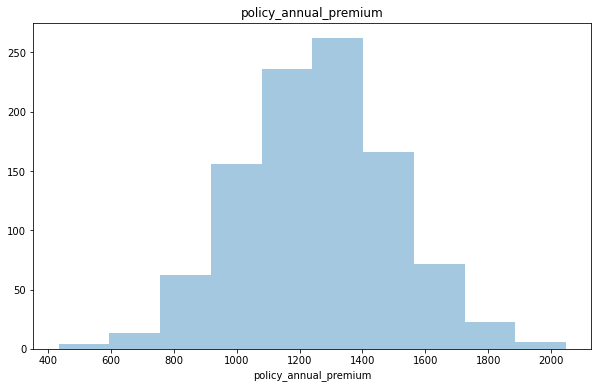

In [73]:
for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (10, 6))
    sns.distplot(df[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

# Data Cleaning:

In [75]:
ins=ins.drop(["insured_occupation","incident_hour_of_the_day","auto_model","_c39"],axis=1)

In [76]:
ins

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,1,0,87200,17440,8720,61040,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,2,3,0,108480,18080,18080,72320,13,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,3,2,67500,7500,7500,52500,11,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,0,1,2,46980,5220,5220,36540,1,1998,0


# Removing Outliers:

# z-Score Technique:

In [77]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ins))
z.shape

(1000, 36)

In [78]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 31,  8,  8,  8,  7, 15,
        8,  8,  8], dtype=int64))


In [79]:
ins_new=ins[(z<3).all(axis=1)]
print(ins.shape)
print(ins_new.shape)

(1000, 36)
(980, 36)


Percentage Data Loss

In [80]:
percentage_loss=((1000-980)/1000)*100
print(percentage_loss)

2.0


# IQR Technique:

In [81]:
Q1 = ins.quantile(0.25)
Q3 = ins.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

months_as_customer                160.5000
age                                12.0000
policy_number                  423119.5000
policy_bind_date                  479.5000
policy_state                        2.0000
policy_csl                          2.0000
policy_deductable                1500.0000
policy_annual_premium             326.0875
umbrella_limit                      0.0000
insured_zip                    154846.5000
insured_sex                         1.0000
insured_education_level             4.0000
insured_hobbies                    10.0000
insured_relationship                3.0000
capital-gains                   51025.0000
capital-loss                    51500.0000
incident_date                      29.2500
incident_type                       2.0000
collision_type                      2.0000
incident_severity                   2.0000
authorities_contacted               3.0000
incident_state                      4.0000
incident_city                       4.0000
incident_lo

In [82]:
ins_new1= ins[~((ins < (Q1 - 1.5 * IQR)) |(ins > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ins_new1.shape)

(600, 36)


In [83]:
percentage_loss=((1000-600)/1000)*100
print(percentage_loss)

40.0


The percentage loss in the z-score is less, so we prefer z-score over IQR.

# Dividing dataframe into feature and target:

In [84]:
x=ins_new.iloc[:,:-1]
y=ins_new.iloc[:,-1]

In [85]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)

In [87]:
ytrain.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

# Transforming data to remove skewness:

In [88]:
from sklearn.preprocessing import power_transform
xtrain=power_transform(xtrain,method='yeo-johnson')
xtrain

array([[ 1.08443676,  1.04664642,  0.00295851, ...,  0.72823129,
         0.98450695, -0.19413331],
       [ 0.3015361 ,  0.45615034, -0.73590617, ..., -1.96936258,
         0.52695271,  0.34184901],
       [-0.5549165 , -1.16369762,  0.61777683, ..., -1.07308338,
        -0.50126436,  0.34184901],
       ...,
       [-0.25449196,  0.45615034, -0.42734222, ...,  0.31071865,
        -0.2255182 , -0.54800931],
       [ 1.42286259,  1.57007819,  1.36945993, ...,  0.15355601,
        -1.88330286, -0.01616397],
       [ 0.83666573,  0.66150512,  0.82655948, ...,  1.70183822,
         0.03615785, -0.37141431]])

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtrain

array([[ 1.08443676,  1.04664642,  0.00295851, ...,  0.72823129,
         0.98450695, -0.19413331],
       [ 0.3015361 ,  0.45615034, -0.73590617, ..., -1.96936258,
         0.52695271,  0.34184901],
       [-0.5549165 , -1.16369762,  0.61777683, ..., -1.07308338,
        -0.50126436,  0.34184901],
       ...,
       [-0.25449196,  0.45615034, -0.42734222, ...,  0.31071865,
        -0.2255182 , -0.54800931],
       [ 1.42286259,  1.57007819,  1.36945993, ...,  0.15355601,
        -1.88330286, -0.01616397],
       [ 0.83666573,  0.66150512,  0.82655948, ...,  1.70183822,
         0.03615785, -0.37141431]])

# MODEL BUILDING:

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression:

In [91]:
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=i)
    lg.fit(train_x,train_y)
    pred_train=lg.predict(train_x)
    pred_test=lg.predict(test_x)
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs well")
        print("At random state:",i)
        print("Training Accuracy:",accuracy_score(train_y,pred_train)*100)
        print("Testing Accuracy:",accuracy_score(test_y,pred_test)*100)

At random state 179 The model performs well
At random state: 179
Training Accuracy: 83.44594594594594
Testing Accuracy: 83.44594594594594
At random state 180 The model performs well
At random state: 180
Training Accuracy: 82.77027027027027
Testing Accuracy: 82.77027027027027
At random state 372 The model performs well
At random state: 372
Training Accuracy: 83.1081081081081
Testing Accuracy: 83.1081081081081
At random state 634 The model performs well
At random state: 634
Training Accuracy: 82.77027027027027
Testing Accuracy: 82.77027027027027
At random state 767 The model performs well
At random state: 767
Training Accuracy: 83.36148648648648
Testing Accuracy: 83.44594594594594
At random state 819 The model performs well
At random state: 819
Training Accuracy: 83.36148648648648
Testing Accuracy: 83.44594594594594
At random state 957 The model performs well
At random state: 957
Training Accuracy: 83.1081081081081
Testing Accuracy: 83.1081081081081


In [92]:
train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=73)
print("Classification Report:",classification_report(test_y,pred_test))
print("Confusion Matrix:",confusion_matrix(test_y,pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.52      0.55      0.54       141
           1       0.57      0.54      0.56       155

    accuracy                           0.55       296
   macro avg       0.55      0.55      0.55       296
weighted avg       0.55      0.55      0.55       296

Confusion Matrix: [[78 63]
 [71 84]]


# Cross validation score for Logistic Regression:

In [93]:
from sklearn.model_selection import cross_val_score

lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred_lg = lg.predict(test_x)

lss = accuracy_score(test_y,pred_lg)
for j in range(2,10):
    lsscore = cross_val_score(lg,xtrain,ytrain,cv=j)
    ls_cv = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",ls_cv*100 )
    print("Accuracy score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.10810810810811
Accuracy score is :- 81.08108108108108


At cv:- 3
Cross validation score is:- 77.5102446395283
Accuracy score is :- 81.08108108108108


At cv:- 4
Cross validation score is:- 79.79729729729729
Accuracy score is :- 81.08108108108108


At cv:- 5
Cross validation score is:- 80.74324324324324
Accuracy score is :- 81.08108108108108


At cv:- 6
Cross validation score is:- 80.21159057744424
Accuracy score is :- 81.08108108108108


At cv:- 7
Cross validation score is:- 80.89383119786412
Accuracy score is :- 81.08108108108108


At cv:- 8
Cross validation score is:- 81.01351351351352
Accuracy score is :- 81.08108108108108


At cv:- 9
Cross validation score is:- 81.5040650406504
Accuracy score is :- 81.08108108108108




In [94]:
print("At cv:",8)
print("Cross validation score is:",81.48648648648648)
print("Accuracy score is :",81.08108108108108)

At cv: 8
Cross validation score is: 81.48648648648648
Accuracy score is : 81.08108108108108


The value of cv taken is 8.

# Approaching more classifiers:

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1.Decision Tree Classifier:

In [96]:
parameters = {'criterion':['gini', 'entropy'],'splitter':['best','random']}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}


In [97]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
pred_dtc = dtc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_dtc)*100)
print("Classification report:",classification_report(test_y,pred_dtc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_dtc)*100)

dtc_score = cross_val_score(dtc,xtrain,ytrain,cv=8)
dtc_cc = dtc_score.mean() 
print('Cross Val Score:',dtc_cc*100)

Accuracy Score: 82.77027027027027
Classification report:               precision    recall  f1-score   support

           0       0.81      0.84      0.82       141
           1       0.85      0.82      0.83       155

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       141
           1       0.85      0.82      0.83       155

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       141
           1       0.85      0.82      0.83       155

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       

Cross Val Score: 81.8918918918919


# 2.KNeighbors Classifier:

In [98]:
parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto'}


In [99]:
knc = KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
pred_knc = knc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_knc)*100)
print("Classification report:",classification_report(test_y,pred_knc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_knc)*100)

knc_score = cross_val_score(knc,xtrain,ytrain,cv=8)
knc_cc = knc_score.mean() 
print('Cross Val Score:',knc_cc*100)

Accuracy Score: 70.6081081081081
Classification report:               precision    recall  f1-score   support

           0       0.91      0.43      0.58       141
           1       0.65      0.96      0.77       155

    accuracy                           0.71       296
   macro avg       0.78      0.69      0.68       296
weighted avg       0.77      0.71      0.68       296
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       141
           1       0.65      0.96      0.77       155

    accuracy                           0.71       296
   macro avg       0.78      0.69      0.68       296
weighted avg       0.77      0.71      0.68       296
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       141
           1       0.65      0.96      0.77       155

    accuracy                           0.71       296
   macro avg       0.78      0.69      0.68       296
weighted avg       0

# 3.SVC:

In [100]:
svc = SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
pred_svc = svc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_svc)*100)
print("Classification report:",classification_report(test_y,pred_svc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_svc)*100)

svc_score = cross_val_score(svc,xtrain,ytrain,cv=8)
svc_cc = svc_score.mean() 
print('Cross Val Score:',svc_cc*100)

Accuracy Score: 86.14864864864865
Classification report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86       141
           1       0.87      0.86      0.87       155

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       141
           1       0.87      0.86      0.87       155

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       141
           1       0.87      0.86      0.87       155

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       

Cross Val Score: 84.52702702702703


# ENSEMBLE METHODS:

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1.Random Forest Classifier:

In [102]:
parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 100}


In [103]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=100)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)
pred_rfc = rfc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_rfc)*100)
print("Classification report:",classification_report(test_y,pred_rfc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_rfc)*100)

rfc_score = cross_val_score(rfc,xtrain,ytrain,cv=8)
rfc_cc = rfc_score.mean() 
print('Cross Val Score:',rfc_cc*100)

Accuracy Score: 85.13513513513513
Classification report:               precision    recall  f1-score   support

           0       0.84      0.85      0.85       141
           1       0.86      0.85      0.86       155

    accuracy                           0.85       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.85      0.85      0.85       296
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       141
           1       0.86      0.85      0.86       155

    accuracy                           0.85       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.85      0.85      0.85       296
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       141
           1       0.86      0.85      0.86       155

    accuracy                           0.85       296
   macro avg       0.85      0.85      0.85       296
weighted avg       

Cross Val Score: 86.01351351351352


# 2.Ada Boost Classifier:

In [104]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
abc.fit(train_x,train_y)
abc.score(train_x,train_y)
pred_abc = abc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_abc)*100)
print("Classification report:",classification_report(test_y,pred_abc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_abc)*100)

abc_score = cross_val_score(abc,xtrain,ytrain,cv=8)
abc_cc = abc_score.mean() 
print('Cross Val Score:',abc_cc*100)

Accuracy Score: 86.14864864864865
Classification report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86       141
           1       0.87      0.86      0.87       155

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       141
           1       0.87      0.86      0.87       155

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       296
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       141
           1       0.87      0.86      0.87       155

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       

Cross Val Score: 84.12162162162163


# 3.Gradient Boosting Classifier:

In [105]:
gbc = GradientBoostingClassifier(criterion='mse', n_estimators=100, learning_rate=0.1, loss='deviance')
gbc.fit(train_x,train_y)
gbc.score(train_x,train_y)
pred_gbc = gbc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_gbc)*100)
print("Classification report:",classification_report(test_y,pred_gbc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_gbc)*100)

gbc_score = cross_val_score(gbc,xtrain,ytrain,cv=8)
gbc_cc = gbc_score.mean() 
print('Cross Val Score:',gbc_cc*100)

Accuracy Score: 86.82432432432432
Classification report:               precision    recall  f1-score   support

           0       0.86      0.87      0.86       141
           1       0.88      0.87      0.87       155

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       141
           1       0.88      0.87      0.87       155

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       141
           1       0.88      0.87      0.87       155

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       

Cross Val Score: 86.41891891891892


# 4.Voting Classifier:

In [106]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [107]:
#voting classifier with hard voting
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(train_x,train_y)
y_pred=vot_hard.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("Hard Voting Score %d" %score)

[1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1
 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1]
Hard Voting Score 0


In [108]:
#voting classifier with soft voting
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(train_x,train_y)
y_pred=vot_soft.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("soft Voting Score %d" %score)

[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1]
soft Voting Score 0


The best model is Random Forest Classifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum.


# AUC ROC Curve:

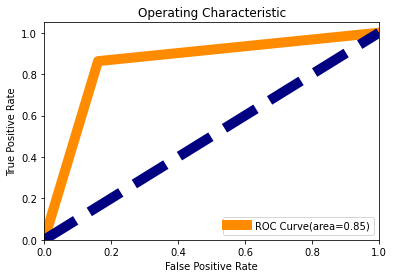

In [109]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_rfc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Saving:

In [110]:
import pickle
filename='insurance_fraud_prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [111]:
import numpy as np
a=np.array(test_y)
predicted=np.array(rfc.predict(test_x))
loan_con=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
loan_con

,original,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
291,1,1
292,1,1
293,0,0
294,0,0


# From the above table, the model is predicted with 86 percent accuracy.